In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
states_map = {
    'AZ':'Arizona',
    'CT':'Connecticut',
    'DE':'Delaware',
    'FL':'Florida',
    'HI':'Hawaii',
    'IN':'Indiana',
    'MA':'Massachusetts',
    'MD':'Maryland',
    'ME':'Maine',
    'MI':'Michigan',
    'MN':'Minnesota',
    'MT':'Montana',
    'ND':'North Dakota',
    'NE':'Nebraska',
    'NJ':'New Jersey',
    'NM':'New Mexico',
    'NV':'Nevada',
    'NY':'New York',
    'OH':'Ohio',
    'PA':'Pennsylvania',
    'RI':'Rhode Island',
    'TN':'Tennessee',
    'TX':'Texas',
    'UT':'Utah',
    'VA':'Virginia',
    'VT':'Vermont',
    'WA':'Washington',
    'WI':'Wisconsin',
    'WV':'West Virginia',
    'WY':'Wyoming'
}


In [10]:
demographics = pd.read_csv('demographics_train.csv')
election = pd.read_csv('election_train.csv')

## TASK 1

In [11]:
election = election.pivot_table(
    index = ['State','County','Office','Year']
    ,columns = 'Party'
    ,values= 'Votes'
).reset_index()

In [12]:
election.head(5)

Party,State,County,Office,Year,Democratic,Republican
0,AZ,Apache County,US Senator,2018,16298.0,7810.0
1,AZ,Cochise County,US Senator,2018,17383.0,26929.0
2,AZ,Coconino County,US Senator,2018,34240.0,19249.0
3,AZ,Gila County,US Senator,2018,7643.0,12180.0
4,AZ,Graham County,US Senator,2018,3368.0,6870.0


## TASK 2

In [13]:
election.head(1)

Party,State,County,Office,Year,Democratic,Republican
0,AZ,Apache County,US Senator,2018,16298.0,7810.0


In [14]:
#map the state initials to the actual full state name
election['State'] = election['State'].map(states_map) #DO THIS ONLY ONCE
election['State'] = election['State'].str.lower()

#get all the indexes where the county doesnt have 'county' in the name already 
no_county_name = election[election["County"].str.contains("County") == False]
add_county = [no_county_name.index.values]

#add 'county' into those that are missing it
for index_val in add_county:
    election.loc[index_val,'County'] = election.loc[index_val,'County'] + ' County'
election.County = election.County.str.lower()

    
election.head(3)

Party,State,County,Office,Year,Democratic,Republican
0,arizona,apache county,US Senator,2018,16298.0,7810.0
1,arizona,cochise county,US Senator,2018,17383.0,26929.0
2,arizona,coconino county,US Senator,2018,34240.0,19249.0


In [15]:
#check if County has any that already contain the word 'county' / none do
demographics[demographics["County"].str.contains("County") == True] 
demographics['State'] = demographics['State'].str.lower()

demographics.County = demographics.County + ' County' #DO THIS ONLY ONCE 
demographics.County = demographics.County.str.lower()

demographics.head(3)

,State,County,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
0,wisconsin,la crosse county,55063,117538,0,90.537528,1.214075,1.724549,2.976059,51.171536,43.241335,14.702479,51477,4.796952,5.474767,67.529757,16.827753
1,virginia,alleghany county,51005,15919,12705,91.940449,5.207614,1.432251,1.300333,51.077329,31.660280,23.902255,45538,4.560986,15.537543,83.711604,52.393846
2,indiana,fountain county,18045,16741,12750,95.705155,0.400215,2.359477,1.547100,49.770026,35.899887,18.941521,45924,7.978789,12.032155,85.538940,65.951276


In [16]:
merged_df = pd.merge(
    demographics, election, how = 'inner', 
    on = ['State','County']
)


In [17]:
len(merged_df) #we have 1200 rows which aligns with the hint

1195

## TASK 3

In [18]:
len(merged_df.columns) #21 variables
merged_df.dtypes

State                                     object
County                                    object
FIPS                                       int64
Total Population                           int64
Citizen Voting-Age Population              int64
Percent White, not Hispanic or Latino    float64
Percent Black, not Hispanic or Latino    float64
Percent Hispanic or Latino               float64
Percent Foreign Born                     float64
Percent Female                           float64
Percent Age 29 and Under                 float64
Percent Age 65 and Older                 float64
Median Household Income                    int64
Percent Unemployed                       float64
Percent Less than High School Degree     float64
Percent Less than Bachelor's Degree      float64
Percent Rural                            float64
Office                                    object
Year                                       int64
Democratic                               float64
Republican          

> FIPS - Take out variable - The FIPS (federal information processing standard) is not necessary. This is a code that helps identify locations, but since we already have the state and county and have votes based on these two regional identifiers, we don't need the FIPS. 

> Total Population - Take out variable - The total population will not have any effect on the number of people that are going to vote. The voting-age population is more representative of who has the ability to vote.

> Year and Office - Take out variable - both of these are all the same for each variable and so hold no value

In [19]:
new_df = merged_df.copy(deep=True) #copy the dataset so that any modifications on new_df, 
                                   #no changes happen to merged_df in case we need to backtrack

In [22]:
fips_df = merged_df[['State','County','FIPS']]

In [13]:

new_df = new_df.drop(["FIPS","Year","Office","Percent Unemployed"], axis=1) #drop vars

In [14]:
new_df.head(1)

,State,County,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Democratic,Republican
0,wisconsin,la crosse county,117538,0,90.537528,1.214075,1.724549,2.976059,51.171536,43.241335,14.702479,51477,5.474767,67.529757,16.827753,35731.0,21160.0


## TASK 4

In [15]:
print("Max rows", len(new_df)) #this shows the total number of rows

#this will give us the columns with zeroes and the num of zeroes
cols_zeroes = pd.DataFrame(columns = ["Column","Rows with zero"])

index = 0
for column in new_df:
    count = len(new_df[new_df[column] == 0])
    index +=1
    cols_zeroes.loc[index] = [column,count]

print("\nColumns with zero values\n", cols_zeroes)
#we can see that the citizen voting-age population has 680/1200 rows missing data
#i think it is better to drop the column rather than the rows. let me know what you think

new_df.drop("Citizen Voting-Age Population", axis=1,inplace=True)

#we also have other zero values, however...
new_df[new_df["Percent Black, not Hispanic or Latino"] == 0]
#the majority populations are very small in nature, and are predominantly white
#it is not outlandish to reason that there may be a population of zero black.
#this is similar reasoning pushed onto the remaining zero values, where it is 
#not impossible to have values of zero.

#____________________________________________________________________________________
#this will show us which columns have NA values
has_na_vals = []
for column in new_df:
    check_na = new_df[new_df[column].isna()]
    if check_na.empty == False:
        has_na_vals.append([column,len(check_na)])

print("\nColumns with NA values\n", has_na_vals)

#we have 5 rows of dem/rep row missing

#this shows the missing rows are both in the same columns. it is a small subset, so opt to take those out
temp_df = new_df[new_df["Republican"] == 0]
zero_party_rows = temp_df.index

fips_df.drop(zero_party_rows, axis=0, inplace=True)
new_df.drop(zero_party_rows, axis=0, inplace=True)

temp_df = new_df[new_df["Republican"].isna()]
na_rows = temp_df.index

new_df.drop(na_rows, axis=0, inplace=True)

#confirms we dropped it, we now have 1195 rows
len(new_df)

Max rows 1195

Columns with zero values
                                    Column Rows with zero
1                                   State              0
2                                  County              0
3                        Total Population              0
4           Citizen Voting-Age Population            675
5   Percent White, not Hispanic or Latino              0
6   Percent Black, not Hispanic or Latino             45
7              Percent Hispanic or Latino              5
8                    Percent Foreign Born              3
9                          Percent Female              0
10               Percent Age 29 and Under              0
11               Percent Age 65 and Older              0
12                Median Household Income              0
13   Percent Less than High School Degree              0
14    Percent Less than Bachelor's Degree              0
15                          Percent Rural             19
16                             Democratic      

1195

## TASK 5

In [16]:
new_df["Party"] = np.where(new_df["Democratic"] > new_df["Republican"], 1,0)
new_df.head(1)

,State,County,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Democratic,Republican,Party
0,wisconsin,la crosse county,117538,90.537528,1.214075,1.724549,2.976059,51.171536,43.241335,14.702479,51477,5.474767,67.529757,16.827753,35731.0,21160.0,1


## TASK 6

In [ ]:
fips_df = merged_df

In [17]:
dem_pop = new_df[new_df['Party'] == 1]['Total Population'].mean()
rep_pop = new_df[new_df['Party'] == 0]['Total Population'].mean()

dem_std = new_df[new_df['Party'] == 1]['Total Population'].std()
rep_std = new_df[new_df['Party'] == 0]['Total Population'].std() #wide var difference

print("dem mean: ", dem_pop,"\nrep mean: ", rep_pop) #democratic population is higher
print("dem std: ",dem_std,"\nrep std: ", rep_std,"\n")

#null = population difference is within reasonable bounds
#alternate = population difference is statistically significant

dem_pop_array = new_df[new_df['Party'] == 1]['Total Population']
rep_pop_array = new_df[new_df['Party'] == 0]['Total Population']

[statistic, pvalue] = st.ttest_ind(dem_pop_array, rep_pop_array, equal_var = False)
print(statistic)
print(pvalue/2) #is e^-14, so it is a very small number

#based on this, this is statistically significant. we reject the null hypothesis based on pval

dem mean:  300998.3169230769 
rep mean:  53864.6724137931
dem std:  553600.0257123302 
rep std:  94192.57279397613 

8.004638577960957
1.0239358801486512e-14


## TASK 7

In [18]:
dem_med = new_df[new_df['Party'] == 1]['Median Household Income'].mean()
rep_med = new_df[new_df['Party'] == 0]['Median Household Income'].mean()

dem_std = new_df[new_df['Party'] == 1]['Median Household Income'].std()
rep_std = new_df[new_df['Party'] == 0]['Median Household Income'].std() #wide var difference

print("dem mean: ", dem_med,"\nrep mean: ", rep_med) #democratic mean median household income is higher
print("dem std: ",dem_std,"\nrep std: ", rep_std,"\n")

#null = population income is within reasonable bounds
#alternate = population income is statistically significant

dem_med_array = new_df[new_df['Party'] == 1]['Median Household Income']
rep_med_array = new_df[new_df['Party'] == 0]['Median Household Income']

[statistic, pvalue] = st.ttest_ind(dem_med_array, rep_med_array, equal_var = False)
print(statistic)
print(pvalue/2) #is e^-08, so it is a very small number

#based on this, this is statistically significant. we reject the null hypothesis based on pval

dem mean:  53798.732307692306 
rep mean:  48746.81954022989
dem std:  15289.130077404618 
rep std:  10670.72941182022 

5.479141589767388
3.574718681591286e-08


## TASK 8

In [19]:
new_df[new_df['Party'] == 1].mean() #Democratic county Averages

Total Population                         300998.316923
Percent White, not Hispanic or Latino        69.683766
Percent Black, not Hispanic or Latino         9.242649
Percent Hispanic or Latino                   12.587391
Percent Foreign Born                          7.986330
Percent Female                               50.385433
Percent Age 29 and Under                     38.726959
Percent Age 65 and Older                     16.194826
Median Household Income                   53798.732308
Percent Less than High School Degree         11.883760
Percent Less than Bachelor's Degree          71.968225
Percent Rural                                36.123281
Democratic                                71193.172308
Republican                                41322.861538
Party                                         1.000000
dtype: float64

In [20]:
new_df[new_df['Party'] == 0].mean() #Republican county Averages 

Total Population                         53864.672414
Percent White, not Hispanic or Latino       82.656646
Percent Black, not Hispanic or Latino        4.189241
Percent Hispanic or Latino                   9.733094
Percent Foreign Born                         3.990096
Percent Female                              49.630898
Percent Age 29 and Under                    36.005719
Percent Age 65 and Older                    18.828267
Median Household Income                  48746.819540
Percent Less than High School Degree        14.009112
Percent Less than Bachelor's Degree         81.095427
Percent Rural                               63.274485
Democratic                                7926.549425
Republican                               12644.403448
Party                                        0.000000
dtype: float64

In [21]:
new_df[new_df['Party'] == 1].describe() # Democratic counties Descriptive Stats

,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Democratic,Republican,Party
count,3.250000e+02,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.0
mean,3.009983e+05,69.683766,9.242649,12.587391,7.986330,50.385433,38.726959,16.194826,53798.732308,11.883760,71.968225,36.123281,71193.172308,41322.861538,1.0
std,5.536000e+05,24.981502,13.351340,19.575030,8.330740,2.149359,6.252786,4.282422,15289.130077,6.505613,11.192404,32.259481,125306.803889,74689.108440,0.0
min,1.969000e+03,2.776702,0.000000,0.193349,0.179769,34.245291,23.156452,6.653188,21190.000000,3.215803,26.335440,0.000000,521.000000,220.000000,1.0
25%,2.364500e+04,53.271579,0.839103,2.531017,2.470508,49.854280,34.488444,13.106233,44140.000000,7.893714,65.711800,5.928800,5242.000000,3611.000000,1.0
50%,8.204900e+04,77.786090,3.485992,5.039747,5.105490,50.653830,38.074151,15.698087,51477.000000,10.370080,72.736143,26.862739,18159.000000,12348.000000,1.0
75%,2.847880e+05,90.300749,11.058843,11.857116,10.144555,51.492075,42.161162,18.806426,59132.000000,13.637059,79.903653,60.670737,72677.000000,46403.000000,1.0
max,4.434257e+06,98.063495,63.953279,95.479801,52.229868,56.418468,67.367823,31.642106,125672.000000,49.673777,94.849957,100.000000,881802.000000,672505.000000,1.0


In [22]:
new_df[new_df['Party'] == 0].describe() # Republican counties Descriptive Stats

,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Democratic,Republican,Party
count,8.700000e+02,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.0
mean,5.386467e+04,82.656646,4.189241,9.733094,3.990096,49.630898,36.005719,18.828267,48746.819540,14.009112,81.095427,63.274485,7926.549425,12644.403448,0.0
std,9.419257e+04,16.056122,6.721695,14.049576,4.507786,2.429013,5.181522,4.733155,10670.729412,6.303126,6.815537,28.766224,17538.649168,22601.266060,0.0
min,7.600000e+01,18.758977,0.000000,0.000000,0.000000,21.513413,11.842105,6.954387,24000.000000,2.134454,43.419470,0.000000,6.000000,46.000000,0.0
25%,9.559500e+03,75.016397,0.460419,1.704539,1.320101,49.222905,32.983652,15.784982,41506.500000,9.662491,78.108424,40.738057,951.500000,2544.000000,0.0
50%,2.546500e+04,89.434849,1.318311,3.427435,2.326317,50.176792,35.846532,18.377896,47168.500000,12.572435,82.406700,63.415088,2807.500000,5932.500000,0.0
75%,5.372100e+04,94.466596,4.753831,10.709696,5.149429,50.829770,38.539787,21.112847,53423.250000,17.447168,85.546272,91.701077,7010.750000,12632.750000,0.0
max,1.092518e+06,99.627329,41.563041,78.397012,37.058317,55.885023,58.749116,37.622759,108177.000000,47.812773,97.014925,100.000000,215190.000000,219990.000000,0.0


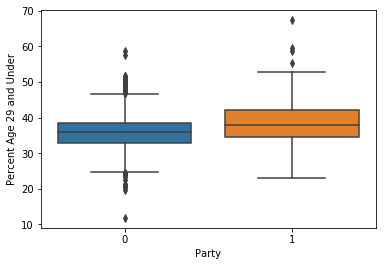

In [23]:
# The next few plots show the distribution by Age between Democratic and Republican counties
new_df.groupby('Party')
sns.boxplot(x = new_df['Party'], y = new_df['Percent Age 29 and Under'])

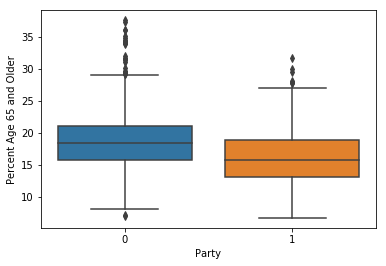

In [24]:
new_df.groupby('Party')
sns.boxplot(x = new_df['Party'], y = new_df['Percent Age 65 and Older'])

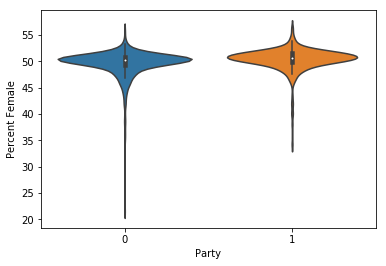

In [25]:
# Visualize the percentage of females for each party
new_df.groupby('Party')
sns.violinplot(x = new_df['Party'], y = new_df['Percent Female'])

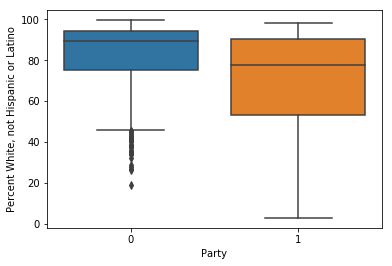

In [26]:
sns.boxplot(x = new_df['Party'], y = new_df['Percent White, not Hispanic or Latino'])

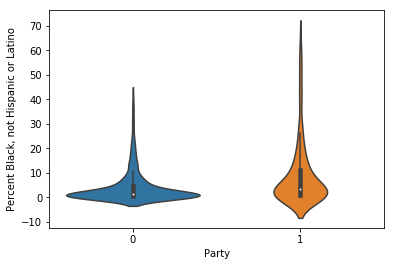

In [27]:
sns.violinplot(x = new_df['Party'], y = new_df['Percent Black, not Hispanic or Latino'])

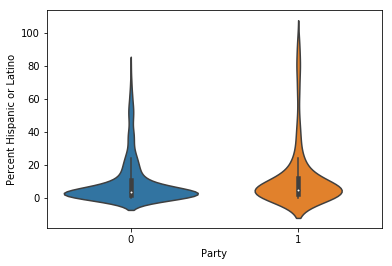

In [28]:
sns.violinplot(x = new_df['Party'], y = new_df['Percent Hispanic or Latino'])

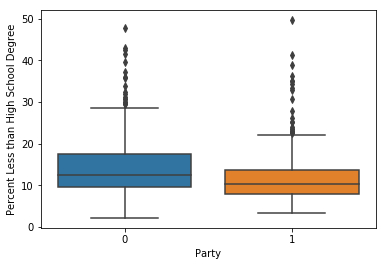

In [29]:
sns.boxplot(x = new_df['Party'], y = new_df['Percent Less than High School Degree'])

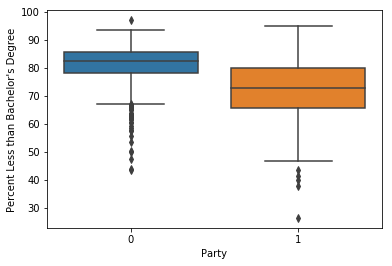

In [30]:
sns.boxplot(x = new_df['Party'], y = new_df['Percent Less than Bachelor\'s Degree'])

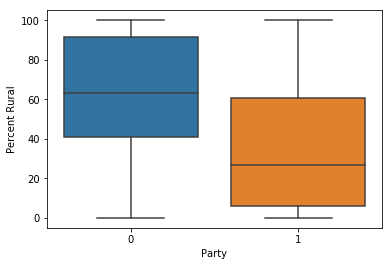

In [31]:
sns.boxplot(x = new_df['Party'], y = new_df['Percent Rural'])

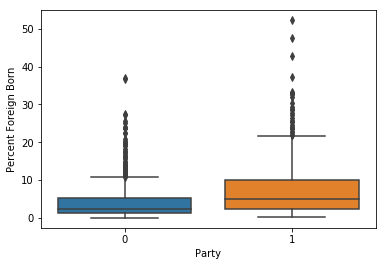

In [32]:
sns.boxplot(x = new_df['Party'], y = new_df['Percent Foreign Born'])

## Task 9

The most helpful variables in helping determine whether a county leans towards voting Democratic or Republican are:
Age, Education, and Percent Rural - More Explanation to come in the PDF written report

## Task 10

In [33]:
#Creating a new column to help with labeling the map
new_df["PartyNames"] = np.where(new_df["Democratic"] > new_df["Republican"], 'Democratic', 'Republican')

In [34]:
import plotly.figure_factory as ff
values = new_df['PartyNames']
fips = merged_df['FIPS']
colorscale = ['rgb(0,0,255)','rgb(255,0,0)']
fig = ff.create_choropleth(fips = fips, values = values,
                           county_outline={'color': 'rgb(0,0,0)', 'width': 0.5},
                           colorscale = colorscale, legend_title = 'Political Parties', 
                           title = 'Democratic Vs Republican Counties By FIPS COde')
# fig.layout.template = None
# fig.show()

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:7138: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.


